## Regularisation : Ridge and Lasso

## Cross Validation- K-Fold cross validation

## Build a model that predicts the car's weight on basis of multiple car properties

In [1]:
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/Cars93.csv'
import pandas as pd
df = pd.read_csv(path,na_values=['','NA'],keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Perform the basic quality checks

In [2]:
df.shape

(93, 28)

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     str    
 2   Model               93 non-null     str    
 3   Type                93 non-null     str    
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     str    
 10  DriveTrain          93 non-null     str    
 11  Cylinders           93 non-null     str    
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.avail     9

In [4]:
# duplicated information
df.duplicated().sum()

np.int64(0)

In [5]:
# There are no duplicated rows in the dataset
df = df.drop_duplicates()

In [6]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='str')

## Separate X and Y features

    X = all the features except id and weight
    Y = Weight

In [7]:
X = df.drop(columns=['id','Weight'])
Y = df[['Weight']]

In [8]:
df.shape

(93, 28)

In [9]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [10]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


## Feature Engineering : Data Cleaning and Data Preprocessing (Feature Scaling)

In [11]:
cat = list(X.columns[X.dtypes=='str'])
con = list(X.columns[X.dtypes!='str'])
print(cat,con,sep='\n')

['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']
['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room']


In [12]:
cat1 = list(X.select_dtypes(include='str').columns)
con1 = list(X.select_dtypes(include='number').columns)
print(cat1,con1,sep='\n')

['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']
['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room']


In [13]:
# Import all the necessary libraries
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create 2 lists that contain categorical and continuous column names
cat1 = list(X.select_dtypes(include='str').columns)
con1 = list(X.select_dtypes(include='number').columns)
print(cat1,con1,sep='\n')

# Build the numerical pipeline
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

# Build the categorical pipeline
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False,handle_unknown='ignore')
)

# Combine both the pipelines
pre = ColumnTransformer([
    ('cat',cat_pipe,cat1),
    ('con',num_pipe,con1)
]).set_output(transform='pandas')

# Apply Fit and transform on X
X_pre = pre.fit_transform(X)
X_pre.head()

['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']
['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room']


,cat__Manufacturer_Acura,cat__Manufacturer_Audi,cat__Manufacturer_BMW,cat__Manufacturer_Buick,cat__Manufacturer_Cadillac,cat__Manufacturer_Chevrolet,cat__Manufacturer_Chrylser,cat__Manufacturer_Chrysler,cat__Manufacturer_Dodge,cat__Manufacturer_Eagle,...,con__RPM,con__Rev.per.mile,con__Fuel.tank.capacity,con__Passengers,con__Length,con__Wheelbase,con__Width,con__Turn.circle,con__Rear.seat.room,con__Luggage.room
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.449727,-1.037572
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.740403,0.391972
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.060329,0.034586
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.080441,1.106743
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.279708,-0.322800


In [14]:
X_pre.columns

Index(['cat__Manufacturer_Acura', 'cat__Manufacturer_Audi',
       'cat__Manufacturer_BMW', 'cat__Manufacturer_Buick',
       'cat__Manufacturer_Cadillac', 'cat__Manufacturer_Chevrolet',
       'cat__Manufacturer_Chrylser', 'cat__Manufacturer_Chrysler',
       'cat__Manufacturer_Dodge', 'cat__Manufacturer_Eagle',
       ...
       'con__RPM', 'con__Rev.per.mile', 'con__Fuel.tank.capacity',
       'con__Passengers', 'con__Length', 'con__Wheelbase', 'con__Width',
       'con__Turn.circle', 'con__Rear.seat.room', 'con__Luggage.room'],
      dtype='str', length=257)

In [15]:
X_pre.columns[0].split('__')

['cat', 'Manufacturer_Acura']

In [16]:
X_pre.columns[0].split('__')[-1]

'Manufacturer_Acura'

## Split the data into training and testing

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=21)

In [18]:
print(f'xtrain:{xtrain.shape}')
print(f'xtest:{xtest.shape}')
print(f'ytrain:{ytrain.shape}')
print(f'ytest:{ytest.shape}')

xtrain:(69, 257)
xtest:(24, 257)
ytrain:(69, 1)
ytest:(24, 1)


## Build the model

In [19]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()
model.fit(xtrain,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
model.score(xtrain,ytrain)

1.0

In [21]:
model.score(xtest,ytest)

0.9118301779580013

## Ridge Regularisation

In [22]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(xtrain,ytrain)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [23]:
ridge_model.score(xtest,ytest)

0.9118966602380507

## Hyperparameter Tuning

In [24]:
import numpy as np
alphas = {'alpha':np.arange(start=0.01,stop=50,step=0.1)}
alphas

{'alpha': array([1.000e-02, 1.100e-01, 2.100e-01, 3.100e-01, 4.100e-01, 5.100e-01,
        6.100e-01, 7.100e-01, 8.100e-01, 9.100e-01, 1.010e+00, 1.110e+00,
        1.210e+00, 1.310e+00, 1.410e+00, 1.510e+00, 1.610e+00, 1.710e+00,
        1.810e+00, 1.910e+00, 2.010e+00, 2.110e+00, 2.210e+00, 2.310e+00,
        2.410e+00, 2.510e+00, 2.610e+00, 2.710e+00, 2.810e+00, 2.910e+00,
        3.010e+00, 3.110e+00, 3.210e+00, 3.310e+00, 3.410e+00, 3.510e+00,
        3.610e+00, 3.710e+00, 3.810e+00, 3.910e+00, 4.010e+00, 4.110e+00,
        4.210e+00, 4.310e+00, 4.410e+00, 4.510e+00, 4.610e+00, 4.710e+00,
        4.810e+00, 4.910e+00, 5.010e+00, 5.110e+00, 5.210e+00, 5.310e+00,
        5.410e+00, 5.510e+00, 5.610e+00, 5.710e+00, 5.810e+00, 5.910e+00,
        6.010e+00, 6.110e+00, 6.210e+00, 6.310e+00, 6.410e+00, 6.510e+00,
        6.610e+00, 6.710e+00, 6.810e+00, 6.910e+00, 7.010e+00, 7.110e+00,
        7.210e+00, 7.310e+00, 7.410e+00, 7.510e+00, 7.610e+00, 7.710e+00,
        7.810e+00, 7.910e+00,

## Cross Validation

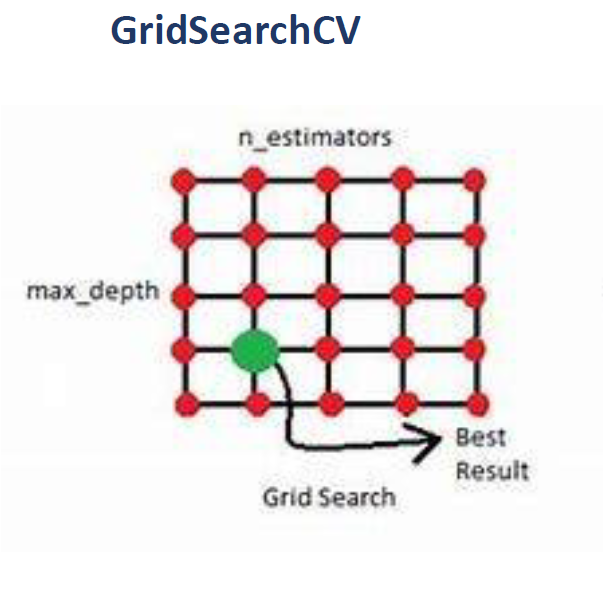

## GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

base_model1 = Ridge()
gscv = GridSearchCV(estimator=base_model1,param_grid=alphas,cv=3,scoring='r2')
gscv.fit(xtrain,ytrain)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Ridge()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'alpha': array([1.000e...1, 4.991e+01])}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter inde

In [29]:
## best parameter the gridsearchCV has found
gscv.best_params_

{'alpha': np.float64(3.91)}

In [30]:
gscv.best_score_

np.float64(0.9274838212647243)

In [31]:
gscv.score(xtrain,ytrain)

0.9897705290498398

In [32]:
gscv.score(xtest,ytest)

0.923875184951855

In [33]:
best_ridge = gscv.best_estimator_
best_ridge

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",np.float64(3.91)
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Grad

In [34]:
## Evaluation of best ridge model

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


def evaluate_model(model,x,y):
    ypreds = model.predict(x)
    # mean squared error
    mse = mean_squared_error(y,ypreds)
    mae = mean_absolute_error(y,ypreds)
    rmse = mse**(1/2)
    r2 = r2_score(y,ypreds)
    return mse,rmse,mae,r2

In [36]:
mse_tr,rmse_tr,mae_tr,r2_tr = evaluate_model(best_ridge,xtrain,ytrain)
mse_te,rmse_te,mae_te,r2_te = evaluate_model(best_ridge,xtest,ytest)

print("==========================================")
print("Training Results")
print(f"MSE:{mse_tr}")
print(f"RMSE:{rmse_tr}")
print(f"MAE:{mae_tr}")
print(f"R2:{r2_tr}")

print("==========================================")
print("Testing Results")
print(f"MSE:{mse_te}")
print(f"RMSE:{rmse_te}")
print(f"MAE:{mae_te}")
print(f"R2:{r2_te}")

Training Results
MSE:3394.8639350851413
RMSE:58.265460910260906
MAE:45.50457489606635
R2:0.9897705290498398
Testing Results
MSE:27052.380367640464
RMSE:164.47607840546436
MAE:121.23440012747818
R2:0.923875184951855


## Lasso Regularization

In [25]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(xtrain,ytrain)

c:\Users\SAMRUDHI\OneDrive\Desktop\DATA SCIENCE\Machine Learning\repository\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.711e+03, tolerance: 2.290e+03
  model = cd_fast.enet_coordinate_descent(


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [26]:
lasso_model.score(xtest,ytest)

0.7247383358427146

## Hyperparameter Tuning

In [27]:
alphas2 = {'alpha':np.arange(start=0.001,step=0.1,stop=50)}
alphas2

{'alpha': array([1.0000e-03, 1.0100e-01, 2.0100e-01, 3.0100e-01, 4.0100e-01,
        5.0100e-01, 6.0100e-01, 7.0100e-01, 8.0100e-01, 9.0100e-01,
        1.0010e+00, 1.1010e+00, 1.2010e+00, 1.3010e+00, 1.4010e+00,
        1.5010e+00, 1.6010e+00, 1.7010e+00, 1.8010e+00, 1.9010e+00,
        2.0010e+00, 2.1010e+00, 2.2010e+00, 2.3010e+00, 2.4010e+00,
        2.5010e+00, 2.6010e+00, 2.7010e+00, 2.8010e+00, 2.9010e+00,
        3.0010e+00, 3.1010e+00, 3.2010e+00, 3.3010e+00, 3.4010e+00,
        3.5010e+00, 3.6010e+00, 3.7010e+00, 3.8010e+00, 3.9010e+00,
        4.0010e+00, 4.1010e+00, 4.2010e+00, 4.3010e+00, 4.4010e+00,
        4.5010e+00, 4.6010e+00, 4.7010e+00, 4.8010e+00, 4.9010e+00,
        5.0010e+00, 5.1010e+00, 5.2010e+00, 5.3010e+00, 5.4010e+00,
        5.5010e+00, 5.6010e+00, 5.7010e+00, 5.8010e+00, 5.9010e+00,
        6.0010e+00, 6.1010e+00, 6.2010e+00, 6.3010e+00, 6.4010e+00,
        6.5010e+00, 6.6010e+00, 6.7010e+00, 6.8010e+00, 6.9010e+00,
        7.0010e+00, 7.1010e+00, 7.2010e

## Cross Validation

In [37]:
base_model2 = Lasso()
gscv2 = GridSearchCV(estimator=base_model2,param_grid=alphas2,cv=3,scoring='r2')
gscv2.fit(xtrain,ytrain)

c:\Users\SAMRUDHI\OneDrive\Desktop\DATA SCIENCE\Machine Learning\repository\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.151e+03, tolerance: 1.308e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\SAMRUDHI\OneDrive\Desktop\DATA SCIENCE\Machine Learning\repository\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.311e+04, tolerance: 1.643e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\SAMRUDHI\OneDrive\Desktop\DATA SCIENCE\Machine Learning\repository\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did no

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Lasso()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'alpha': array([1.0000..., 4.9901e+01])}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter inde

In [38]:
gscv2.best_params_

{'alpha': np.float64(7.901000000000001)}

In [39]:
gscv2.best_score_

np.float64(0.9450624767614432)

In [40]:
gscv2.score(xtrain,ytrain)

0.9643291987140431

In [41]:
gscv2.score(xtest,ytest)

0.9141042788570028

In [42]:
best_lasso = gscv2.best_estimator_ # mocel that is built on best parameter(7.9)
best_lasso

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",np.float64(7.901000000000001)
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


## Evaluation of best lasso model

In [44]:
mse_tr_lasso,rmse_tr_lasso,mae_tr_lasso,r2_tr_lasso = evaluate_model(best_lasso,xtrain,ytrain)
mse_te_lasso,rmse_te_lasso,mae_te_lasso,r2_te_lasso = evaluate_model(best_lasso,xtest,ytest)


In [45]:
print("(==============================")
print("Training Results")
print(f"MSE:{mse_tr_lasso}")
print(f"RMSE:{rmse_tr_lasso}")
print(f"MAE:{mae_tr_lasso}")
print(f"R2:{r2_tr_lasso}")

print("(==============================")
print("Testing Results")
print(f"MSE:{mse_te_lasso}")
print(f"RMSE:{rmse_te_lasso}")
print(f"MAE:{mae_te_lasso}")
print(f"R2:{r2_te_lasso}")

(==============================
Training Results
MSE:11838.101639008644
RMSE:108.8030405779574
MAE:83.75824750707898
R2:0.9643291987140431
(==============================
Testing Results
MSE:30524.65505293547
RMSE:174.71306491769718
MAE:130.72711750192425
R2:0.9141042788570028


## Ridge and Lasso both provide R2 scores more than 80. However, Ridge results in a better score compared to Lasso.

## We will finalise Ridge model

In [46]:
# pip install joblib
import joblib

#  save the pipeline - data cleaning and data preprocessing
joblib.dump(pre,'pre.joblib')

# save the model (best ridge)
joblib.dump(best_ridge,'model_ridge.joblib')

['model_ridge.joblib']

## Load the model

In [47]:
model2 = joblib.load('model_ridge.joblib')
pre2 = joblib.load('pre.joblib')

In [48]:
pre2

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('con', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [49]:
model2

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",np.float64(3.91)
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Grad

## Check the models outputs on any unseen data

In [50]:
path2 = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/cars93-sample.csv'
xnew = pd.read_csv(path2)
xnew.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,NaN,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,NaN,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,NaN,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [51]:
# First prepare the data ready for the model
xnew_pre = pre2.transform(xnew)
xnew_pre

,cat__Manufacturer_Acura,cat__Manufacturer_Audi,cat__Manufacturer_BMW,cat__Manufacturer_Buick,cat__Manufacturer_Cadillac,cat__Manufacturer_Chevrolet,cat__Manufacturer_Chrylser,cat__Manufacturer_Chrysler,cat__Manufacturer_Dodge,cat__Manufacturer_Eagle,...,con__RPM,con__Rev.per.mile,con__Fuel.tank.capacity,con__Passengers,con__Length,con__Wheelbase,con__Width,con__Turn.circle,con__Rear.seat.room,con__Luggage.room
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.410659,-0.510323,0.884457,0.467905,0.302785,-1.164350,-0.610436,1.080441,1.106743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,0.013416,-0.959782,-0.322800
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.135877,0.532158,-0.050439,0.884457,1.018731,0.597644,0.431983,0.325342,0.230348,0.749357
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.054464,-0.014589,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,-0.610436,-0.109689,0.034586
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.441034,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-1.546214,-0.619745,-1.394958


In [52]:
preds = model2.predict(xnew_pre)
preds = preds.round()

In [53]:
preds

array([3299., 2687., 3166., 2926., 2282.])

In [54]:
xnew['Weight_Predictions'] = preds
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight_Predictions
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,190,106,65,37,31.0,17.0,non-USA,Audi 100,3299.0
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,NaN,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2687.0
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,NaN,Front,...,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina,3166.0
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,2926.0
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,NaN,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2282.0


In [55]:
# Save the results to csv file
xnew.to_csv('Weight_Predicts_cars.csv',index=False)